In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# 1-import and represnt data_set

In [3]:
# first of all we import data set from where it will be located
dataFrame = pd.read_csv(r"C:\Users\ATOnile\Downloads\Titanic-Dataset.csv")


In [5]:
# after importing we represent our data wether the data is visible or showing an error
dataFrame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
# to see how many rows and columns present in the data set we will show here
dataFrame.shape

(891, 12)

In [70]:
# to show only first two rows in data set
dataFrame.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C


In [33]:
# to show only last two rows in data set
dataFrame.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


2-Clean the Data 

In [41]:
 # to show how many columns have null values
dataFrame.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [66]:
 # fill the missing column of age with the help of interpolate function 
dataFrame['Age'].interpolate(method = 'linear', inplace=True)

In [72]:
 # to show after fill the missing column of age
dataFrame.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [62]:
 # here we check the data type of each columns 
dataFrame.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int32
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [60]:
# here we change the data type of age we convert it int from float 
dataFrame['Age'] = dataFrame['Age'].astype(int)

In [78]:
# to fill catagorical columns we use mode the most frequwnt value replaces
mode = dataFrame['Cabin'].mode()[0]
 dataFrame['Cabin'].fillna(mode, inplace = True)

In [81]:
 # to show fill categorical values of cabin column
dataFrame.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S


# 3-Detect outlier 

In [91]:
 # to detect outlier first of all we calculate Q1 and Q3
 Q1 = dataFrame['Fare'].quantile(0.25)
 print(Q1)
 Q3 = dataFrame['Fare'].quantile(0.75)
 print(Q3)

7.9104
31.0


In [93]:
# to xalculate IQR
IQR = Q3-Q1
print(IQR)

23.0896


In [99]:
# to detect outlies where are found
lower_bounderies = Q1-1.5*IQR
print(lower_bounderies)
upper_bounderies = Q3+1.5*IQR
print(upper_bounderies)

-26.724
65.6344


In [106]:
# to remove outliers fron data set
dataFrame[(dataFrame['Fare']>= lower_bounderies)&(dataFrame['Fare']<=upper_bounderies)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,S
5,6,0,3,"Moran, Mr. James",male,44,0,0,330877,8.4583,B96 B98,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


In [10]:

scaler = MinMaxScaler()
# nomalize data using min max 
dataFrame[['Age','Fare']]= scaler.fit_transform(dataFrame[['Age','Fare']])
print(dataFrame[['Age','Fare']])

          Age      Fare
0    0.271174  0.014151
1    0.472229  0.139136
2    0.321438  0.015469
3    0.434531  0.103644
4    0.434531  0.015713
..        ...       ...
886  0.334004  0.025374
887  0.233476  0.058556
888       NaN  0.045771
889  0.321438  0.058556
890  0.396833  0.015127

[891 rows x 2 columns]


# WEEK-1 TASK-2
# UNIVARIATE

In [12]:
 # to show all statistics of dataset 
dataFrame.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.367921,0.523008,0.381594,0.062858
std,257.353842,0.486592,0.836071,0.182540,1.102743,0.806057,0.096995
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.247612,0.000000,0.000000,0.015440
50%,446.000000,0.000000,3.000000,0.346569,0.000000,0.000000,0.028213
75%,668.500000,1.000000,3.000000,0.472229,1.000000,0.000000,0.060508
max,891.000000,1.000000,3.000000,1.000000,8.000000,6.000000,1.000000


In [61]:
 # to show only those columns who have int and float data types
num_vars = dataFrame.select_dtypes(include = ['float64', 'int64']).columns
print(num_vars)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


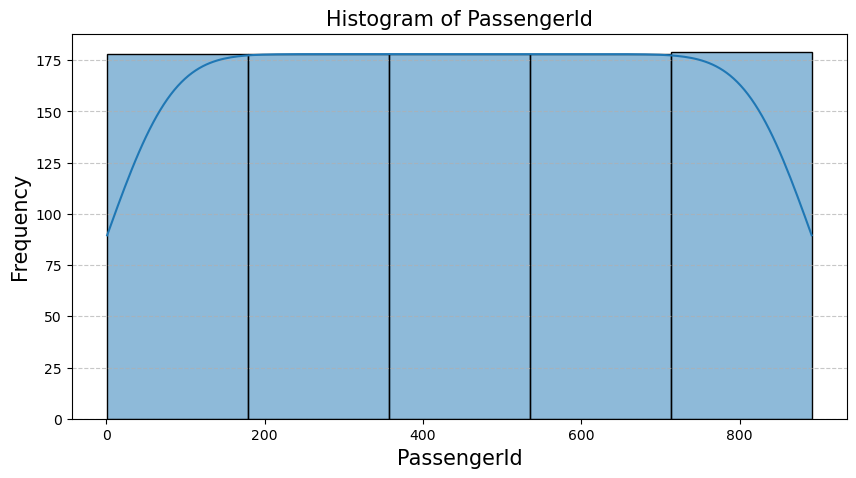

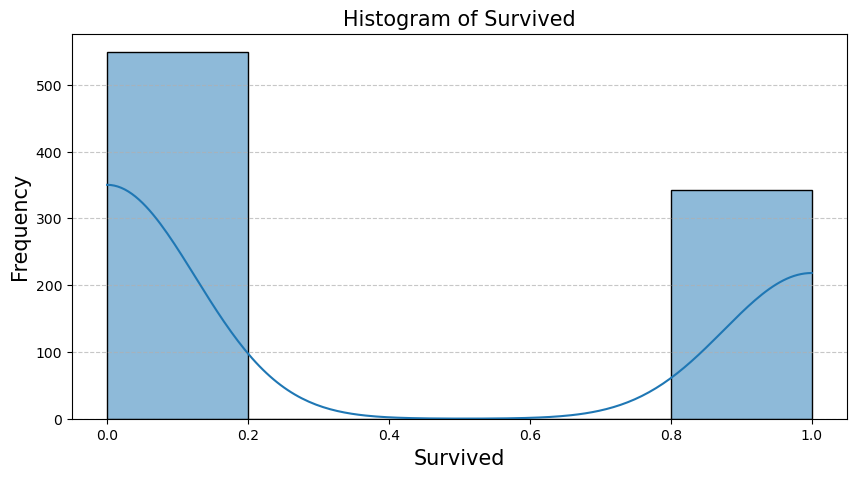

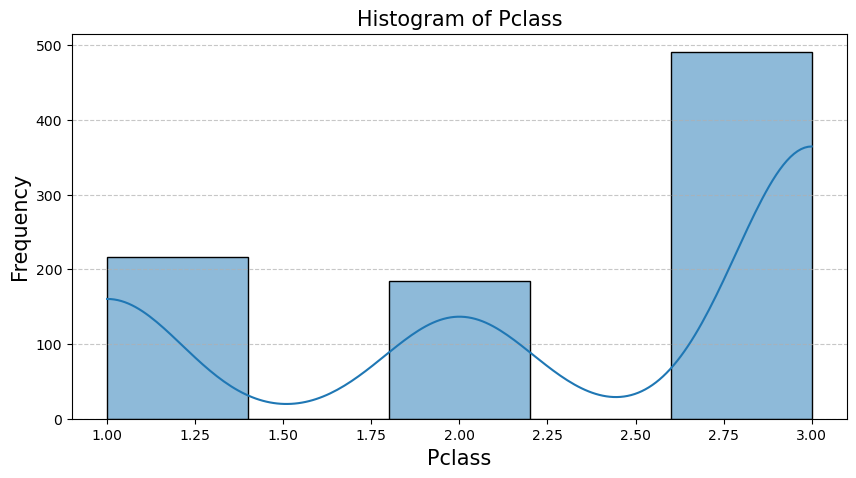

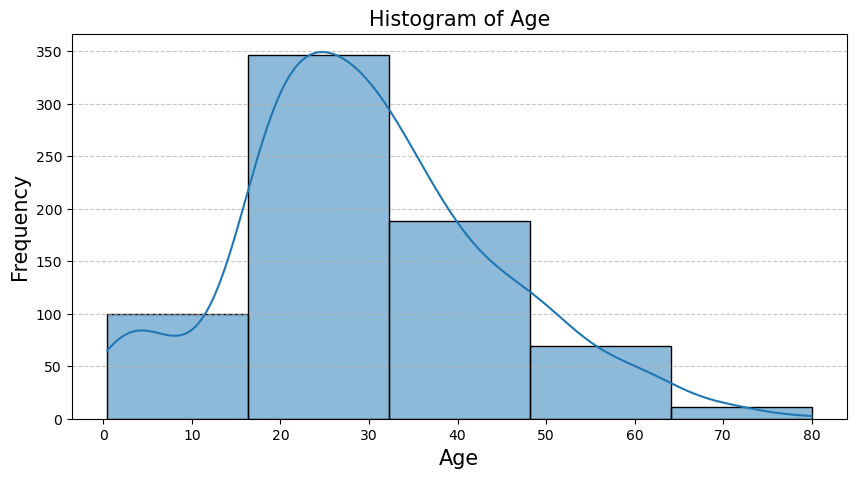

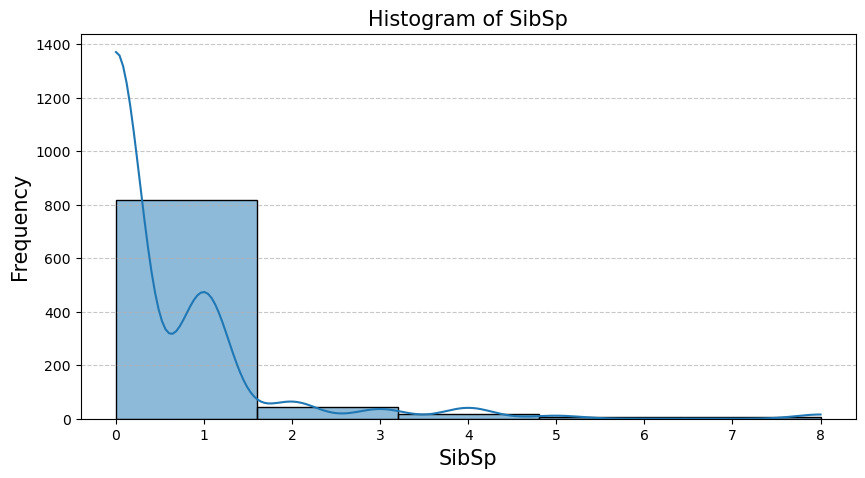

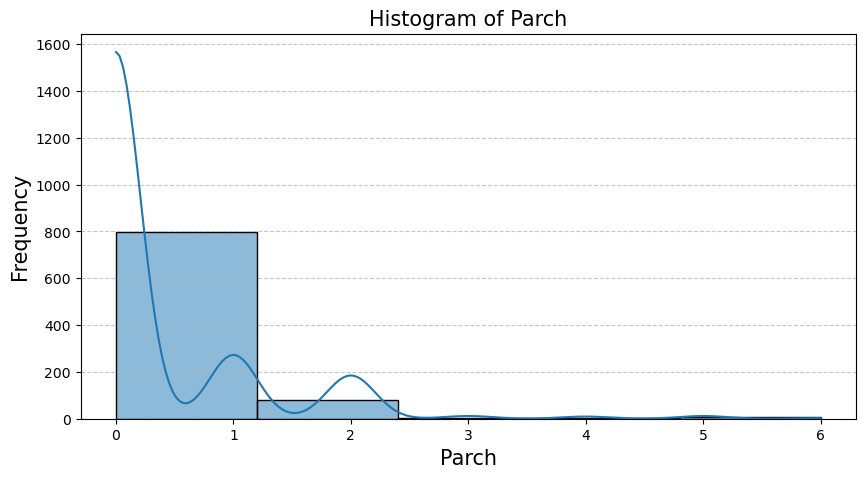

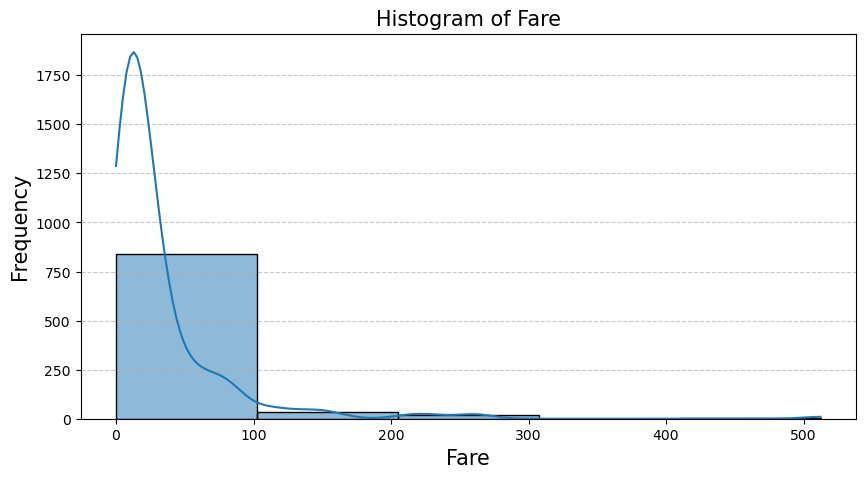

In [91]:
for column in num_vars:
 plt.figure(figsize=(10, 5))
 sns.histplot(dataFrame[column], bins = 5,kde = True)
 plt.title(f'Histogram of {column}',fontsize = 15)
 plt.xlabel(column, fontsize = 15)
 plt.ylabel('Frequency', fontsize = 15)
 plt.grid(axis='y', linestyle='--', alpha=0.7)

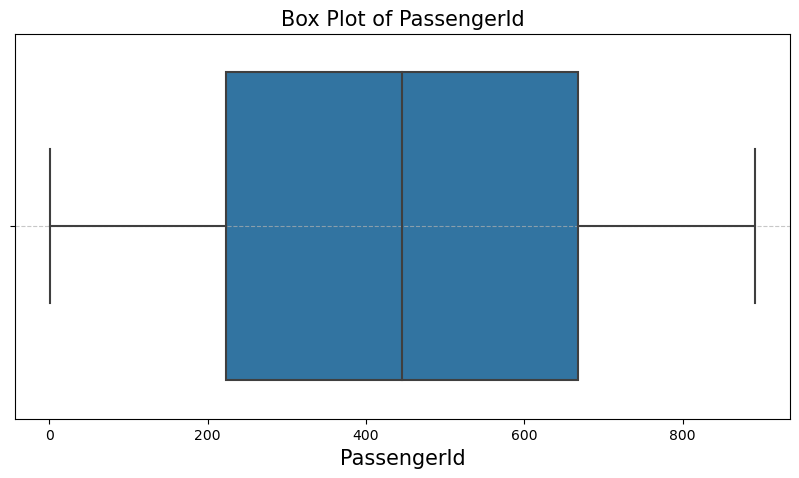

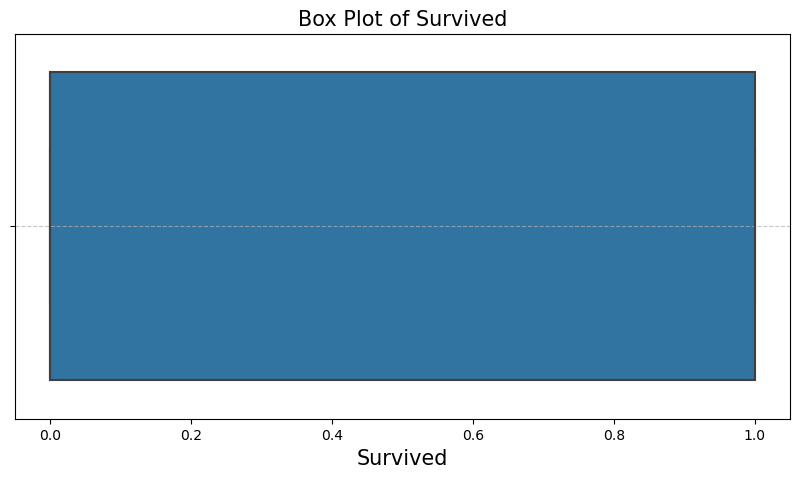

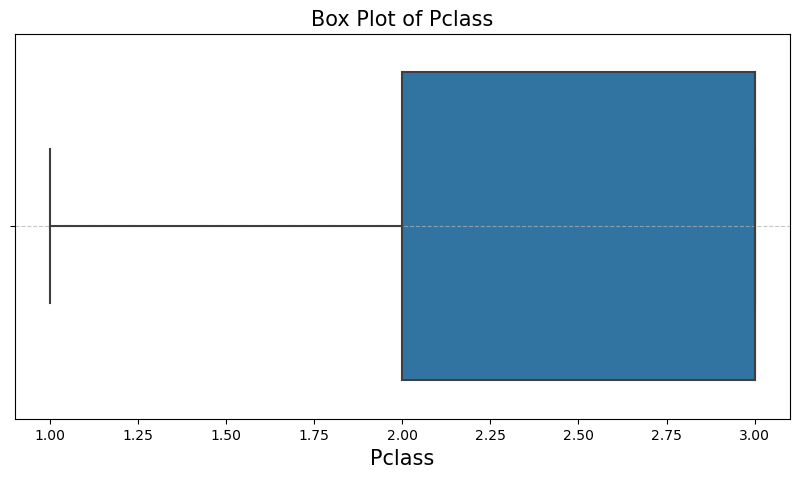

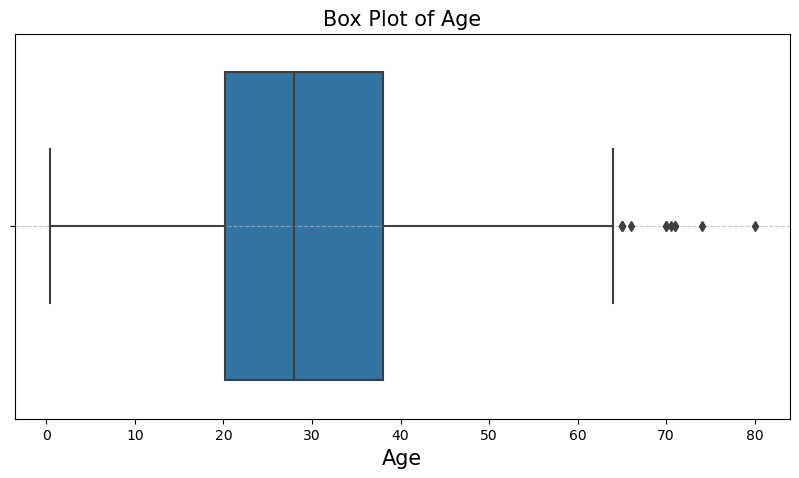

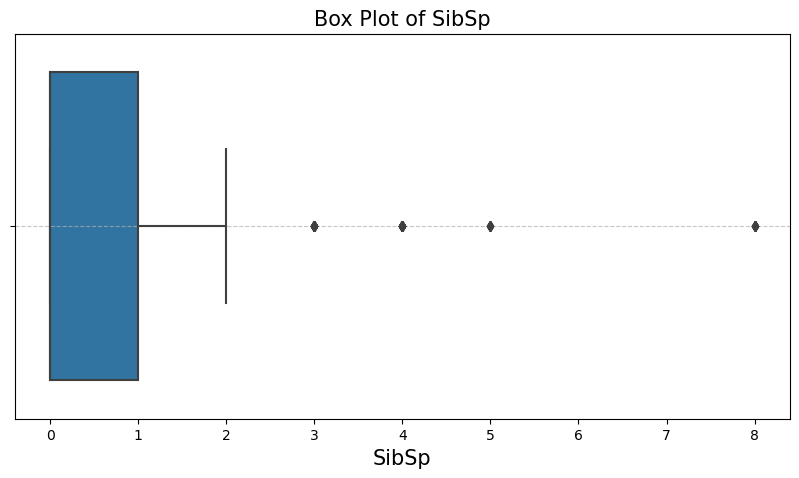

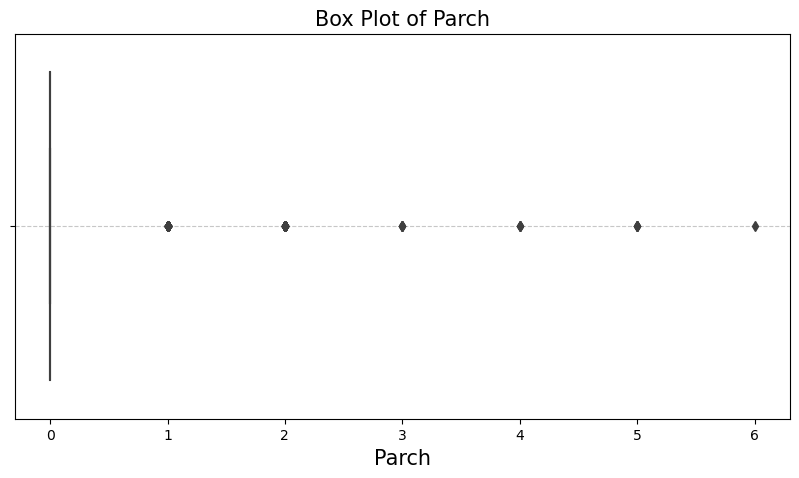

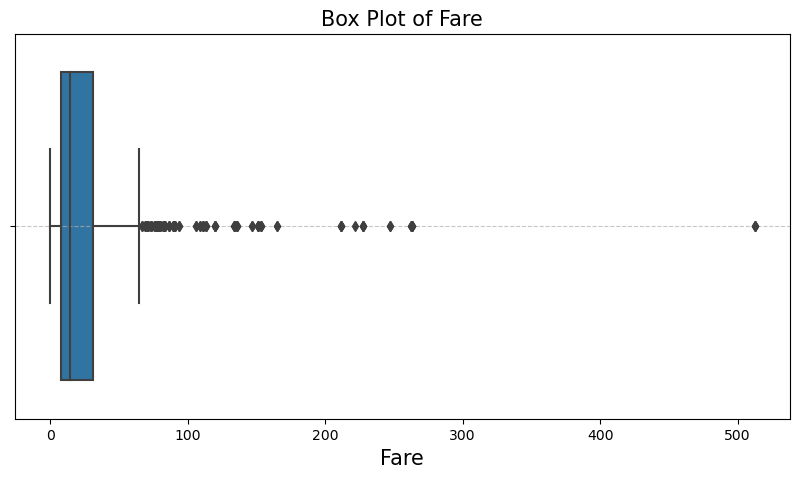

In [93]:
for column in num_vars:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=dataFrame[column])
    plt.title(f'Box Plot of {column}',fontsize = 15)
    plt.xlabel(column, fontsize = 15)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# WEEK-1 TASK-3

  scatter plot

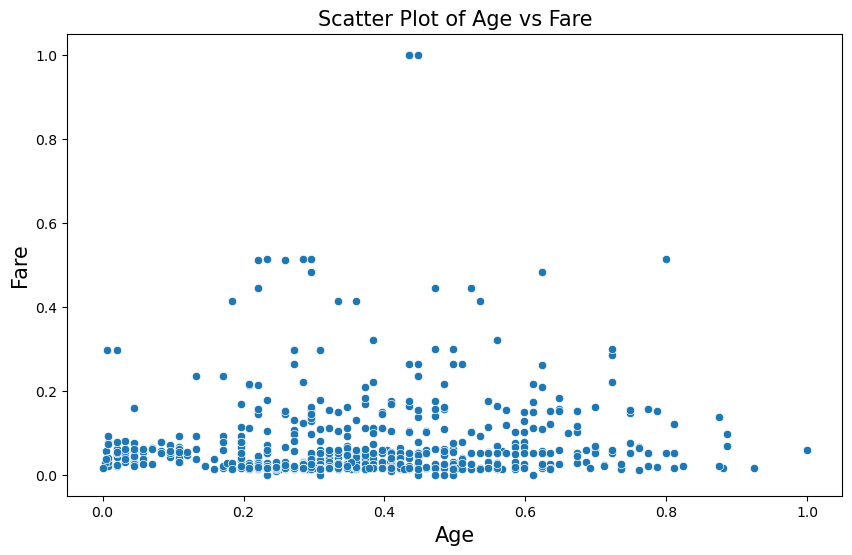

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'Age', y = 'Fare', data = dataFrame)
plt.title('Scatter Plot of Age vs Fare',fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Fare', fontsize = 15)
plt.show()

corelation matics

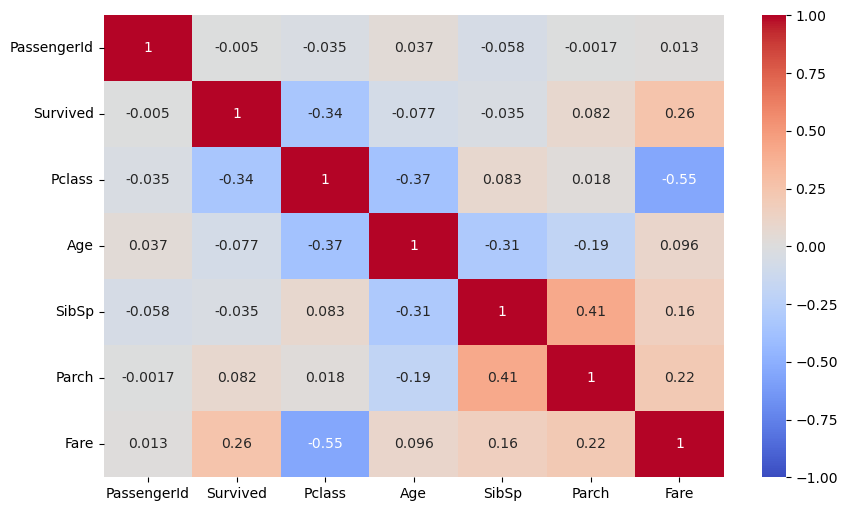

In [86]:
# shows the correlation coefficients between many variables.
numeric_df = dataFrame.select_dtypes(include=[float, int])
cor_matrix = numeric_df.corr()
# xisiuilization 
plt.figure(figsize=(10, 6))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

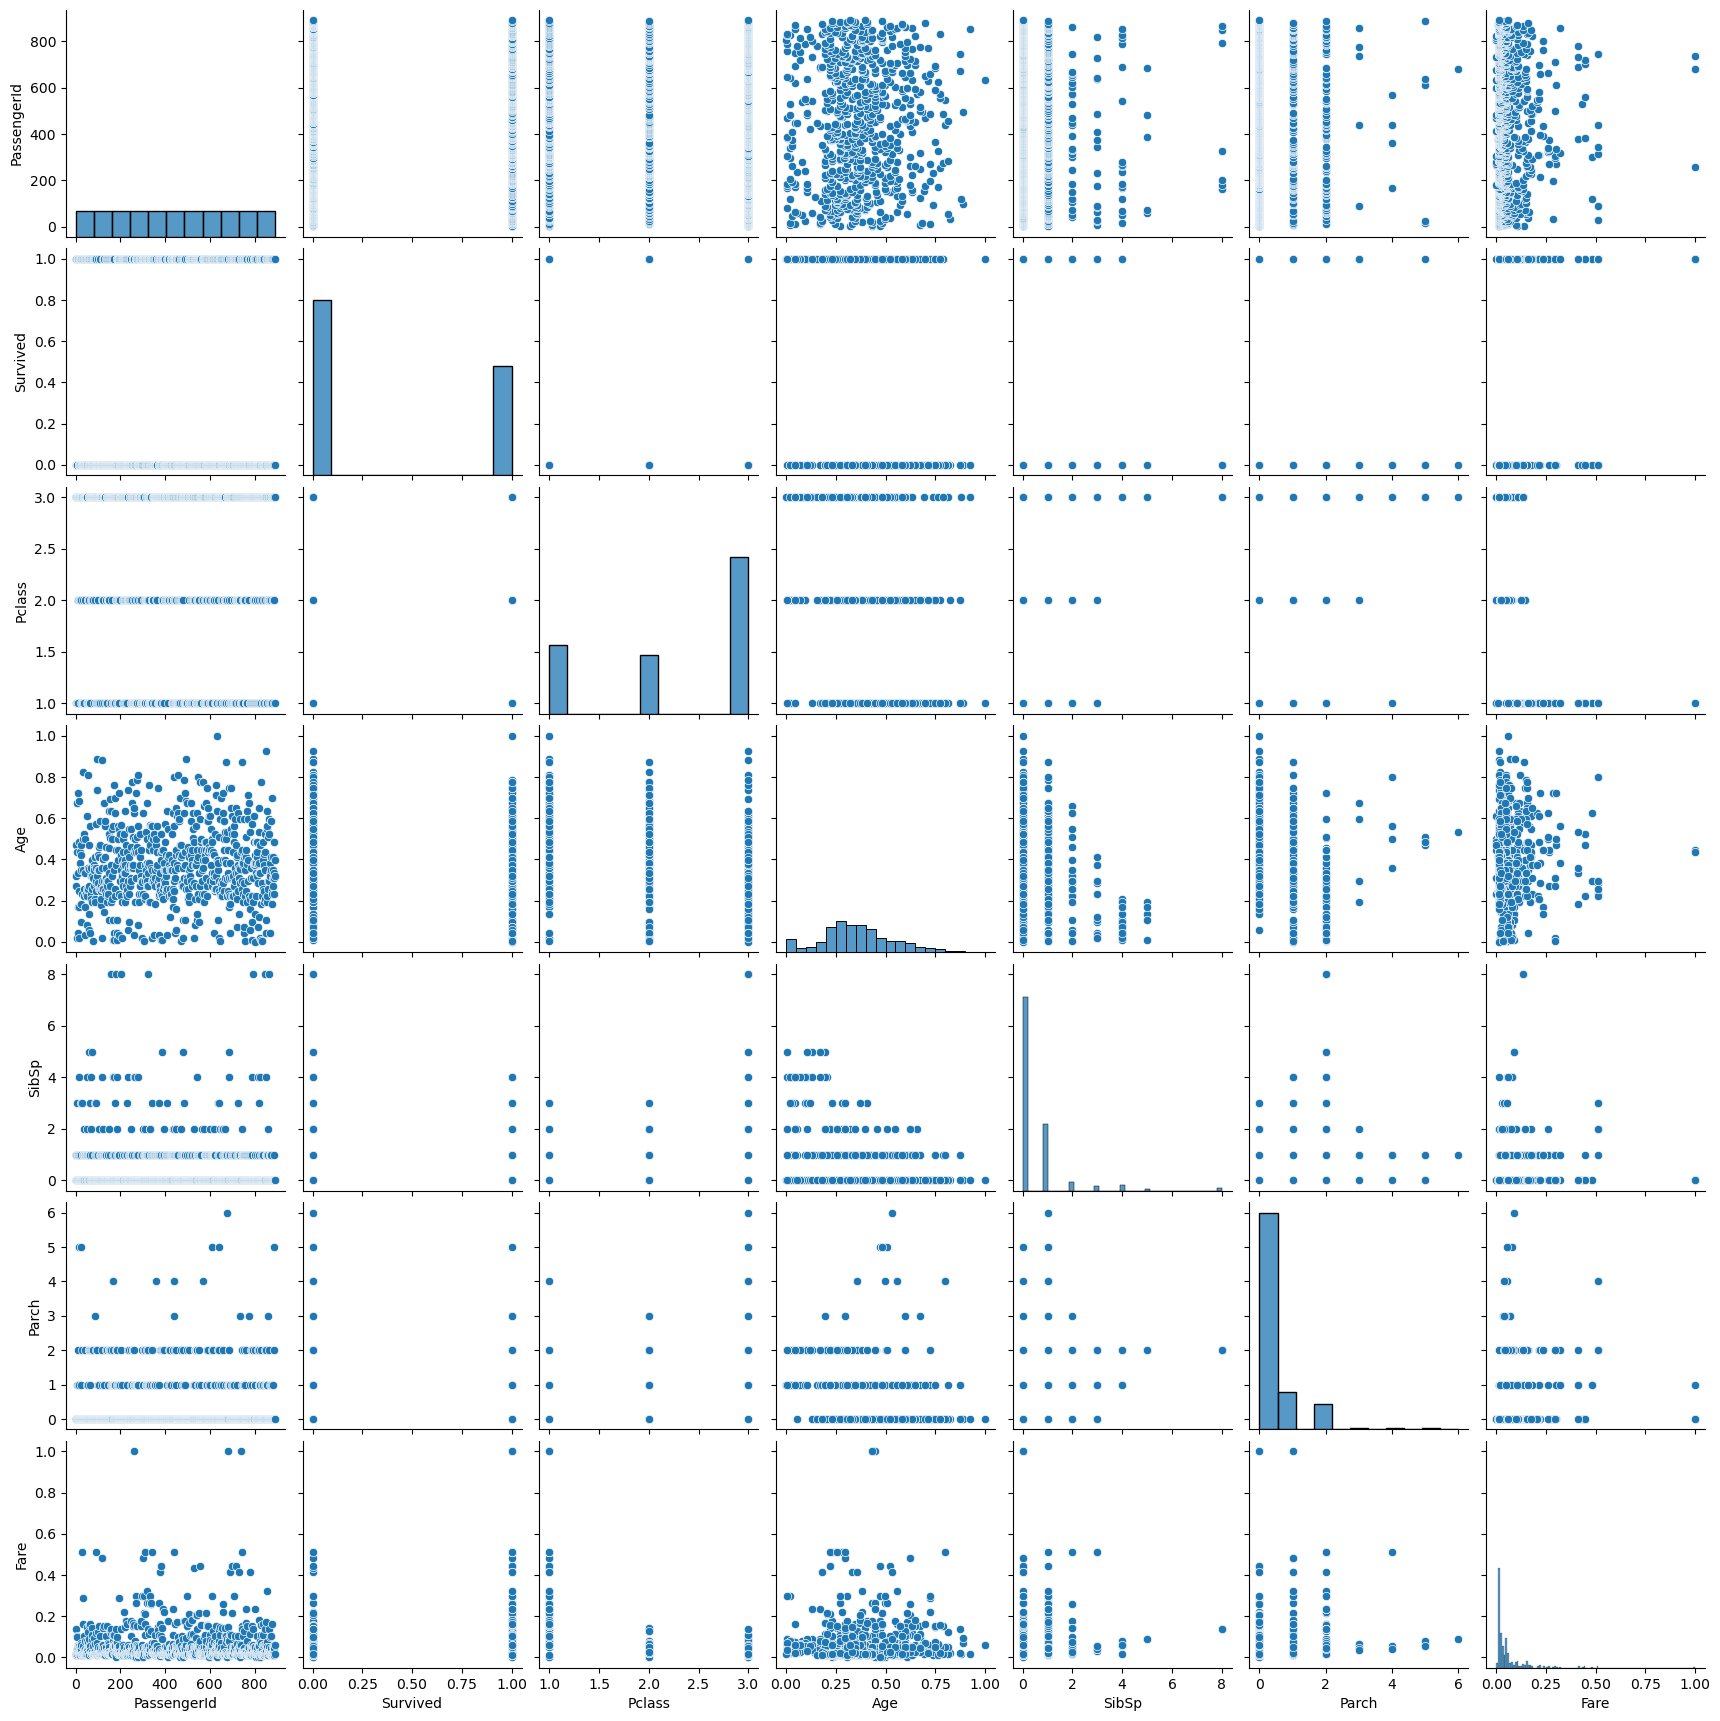

In [101]:
# Pair Plot
numeric_features = dataFrame.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(dataFrame[numeric_features])
plt.show()

 # WEEK_1-TASK-4
 # Visualize categorical data

 barplot of tickets

In [38]:
 # to show the distibution frequency of categorical column by reset index
ticket = dataFrame['Ticket'].value_counts().reset_index()
ticket.columns = ['Ticket', 'Frequency']
print(ticket)

       Ticket  Frequency
0      347082          7
1    CA. 2343          7
2        1601          7
3     3101295          6
4     CA 2144          6
..        ...        ...
676      9234          1
677     19988          1
678      2693          1
679  PC 17612          1
680    370376          1

[681 rows x 2 columns]


In [77]:
 # to show  most 5 tickects
top_ticket_5 = ticket.sort_values(by='Frequency', ascending=False).head(5)
print(top_ticket_5)

     Ticket  Frequency
0    347082          7
2      1601          7
1  CA. 2343          7
3   3101295          6
4   CA 2144          6


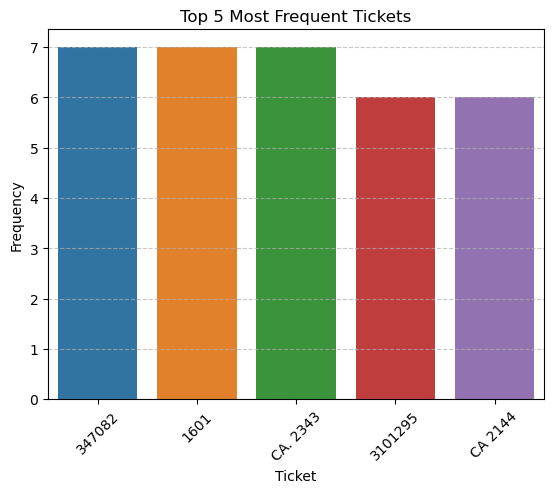

In [89]:
sns.barplot(x= 'Ticket', y = 'Frequency', data = top_ticket_5)
plt.title('Top 5 Most Frequent Tickets')
plt.xlabel('Ticket')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

 barplot of sex

In [136]:
 sex_count = dataFrame['Sex'].value_counts().reset_index()
 sex_count.columns = ['sex', 'count']
 print(sex_count)

      sex  count
0    male    577
1  female    314


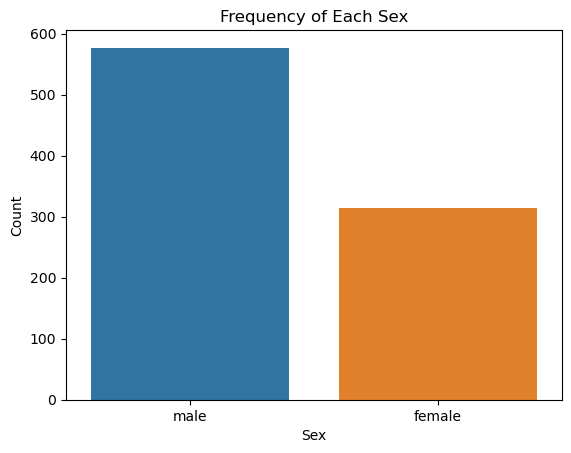

In [144]:
sns.barplot(x = 'sex', y = 'count', data = sex_count)
plt.title('Frequency of Each Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

passanger clas barplot

In [190]:
pclass = dataFrame['Pclass'].value_counts().reset_index()
pclass.columns = ['Pclass', 'count']
print(pclass)

   Pclass  count
0       3    491
1       1    216
2       2    184


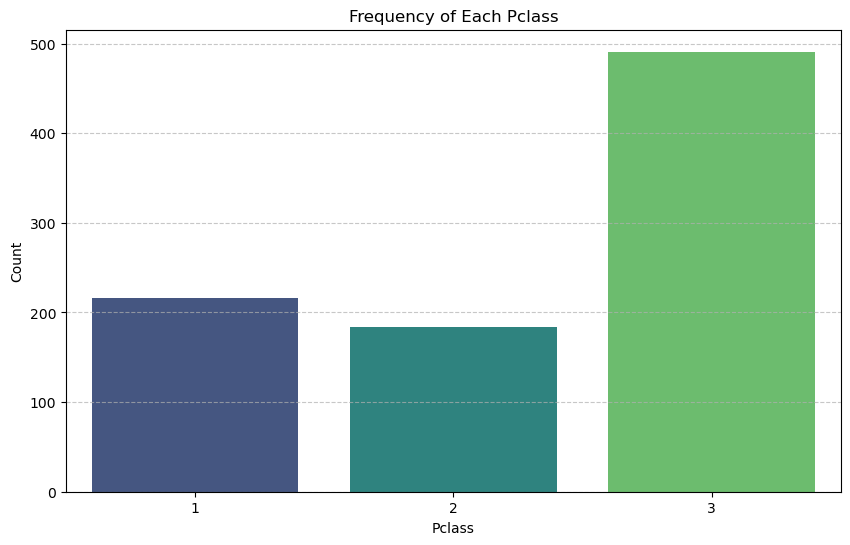

In [194]:
# Plotting the frequency bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='count', data=pclass, palette='viridis')
plt.title('Frequency of Each Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

 barplot of embark

In [200]:
embarked_counts = dataFrame['Embarked'].value_counts().reset_index()
embarked_counts.columns = ['Embarked','count']
print(embarked_counts)

  Embarked  count
0        S    644
1        C    168
2        Q     77


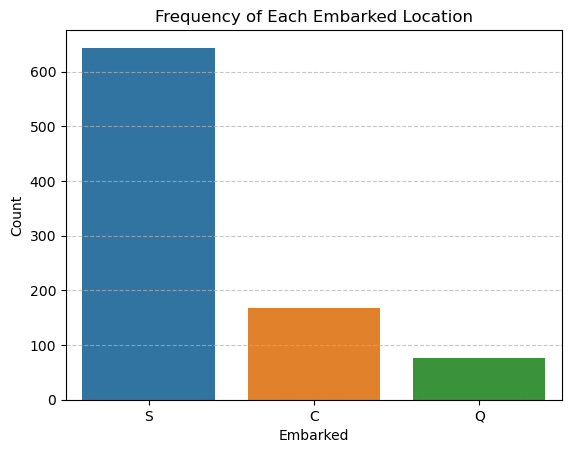

In [204]:
sns.barplot(x = 'Embarked', y = 'count', data = embarked_counts) 
plt.title('Frequency of Each Embarked Location')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

cabin

In [206]:
cabin_counts = dataFrame['Cabin'].value_counts().reset_index()
cabin_counts.columns = ['Cabin', 'count']
print(cabin_counts)

           Cabin  count
0        B96 B98      4
1             G6      4
2    C23 C25 C27      4
3        C22 C26      3
4            F33      3
..           ...    ...
142          E34      1
143           C7      1
144          C54      1
145          E36      1
146         C148      1

[147 rows x 2 columns]


In [210]:
top_cabin_5 = cabin_counts.head(5)
print(top_cabin_5)

         Cabin  count
0      B96 B98      4
1           G6      4
2  C23 C25 C27      4
3      C22 C26      3
4          F33      3


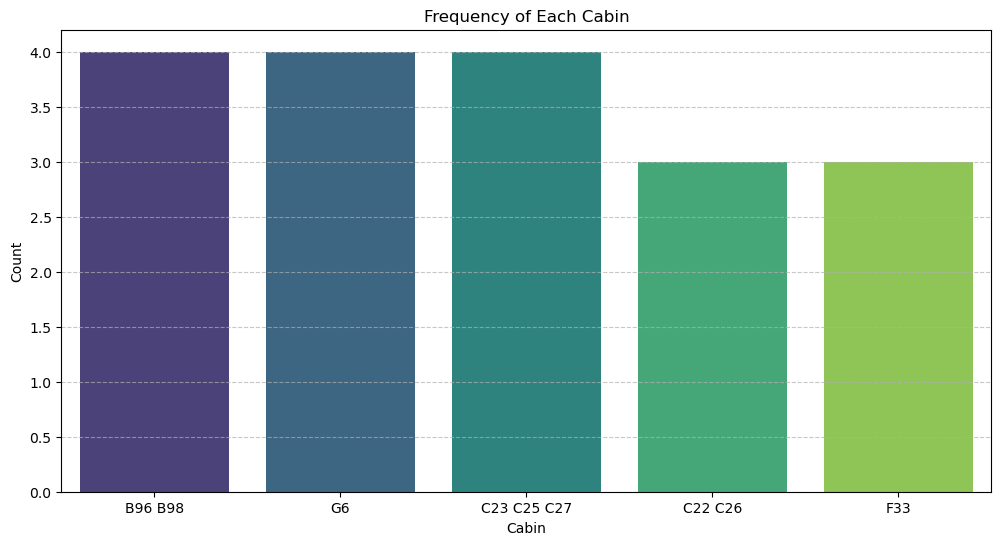

In [214]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Cabin', y='count', data=top_cabin_5, palette='viridis')
plt.title('Frequency of Each Cabin')
plt.xlabel('Cabin')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

 # WEEK_1-TASK-5

# PIVOT TABLE

1-Survival Rate by Passenger Class

In [9]:
 Survival_Rate = pd.pivot_table(dataFrame, values = 'Survived', index = 'Pclass', aggfunc= 'mean')
 print(Survival_Rate)

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


 2-Average Fare by Passenger Class and Embarkation Point

In [16]:
 Average_Fare = pd.pivot_table(dataFrame, values = 'Fare', index = 'Pclass',columns = 'Embarked', aggfunc = 'mean' )
 print(Average_Fare)

Embarked           C          Q          S
Pclass                                    
1         104.718529  90.000000  70.364862
2          25.358335  12.350000  20.327439
3          11.214083  11.183393  14.644083


 3-Survival Rate by Gender

In [18]:
 Gender = pd.pivot_table(dataFrame, values = 'Survived' , index = 'Sex', aggfunc = 'mean')
 print(Gender)

        Survived
Sex             
female  0.742038
male    0.188908


 4-Average Age by Survival Status and Class

In [20]:
 Average_Age = pd.pivot_table(dataFrame, values = 'Age', index = 'Survived', columns = 'Pclass',  aggfunc = 'mean')
 print(Average_Age)

Pclass            1          2          3
Survived                                 
0         43.695312  33.544444  26.555556
1         35.368197  25.901566  20.646118
